In [6]:
import pandas as pd
import sklearn
import numpy as np
import scipy

In [7]:
df = pd.read_csv("data/ks-projects-201801.csv").dropna()

In [8]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt

In [25]:
df2 = df.loc[df["pledged"] > 100]
len(df2)

251688

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([1.99920e+04, 1.37450e+04, 1.02330e+04, 8.15600e+03, 6.64300e+03,
        5.91000e+03, 5.00600e+03, 4.46000e+03, 3.98700e+03, 3.46300e+03,
        3.31800e+03, 2.97900e+03, 2.56000e+03, 2.44700e+03, 2.23800e+03,
        2.05400e+03, 1.87600e+03, 1.76400e+03, 1.60300e+03, 1.43700e+03,
        1.34500e+03, 1.16700e+03, 1.13600e+03, 9.81000e+02, 9.17000e+02,
        9.24000e+02, 7.43000e+02, 7.00000e+02, 6.17000e+02, 5.90000e+02,
        5.18000e+02, 4.88000e+02, 4.41000e+02, 4.35000e+02, 3.43000e+02,
        3.02000e+02, 2.88000e+02, 2.85000e+02, 2.44000e+02, 2.08000e+02,
        2.13000e+02, 1.60000e+02, 1.50000e+02, 1.71000e+02, 1.11000e+02,
        1.06000e+02, 7.30000e+01, 5.20000e+01, 5.30000e+01, 1.34056e+05]),
 array([1.05000000e-06, 2.00010290e-02, 4.00010080e-02, 6.00009870e-02,
        8.00009660e-02, 1.00000945e-01, 1.20000924e-01, 1.40000903e-01,
        1.60000882e-01, 1.80000861e-01, 2.00000840e-01, 2.20000819e-01,
        2.40000798e-01, 2.60000777e-01, 2.80000756e-

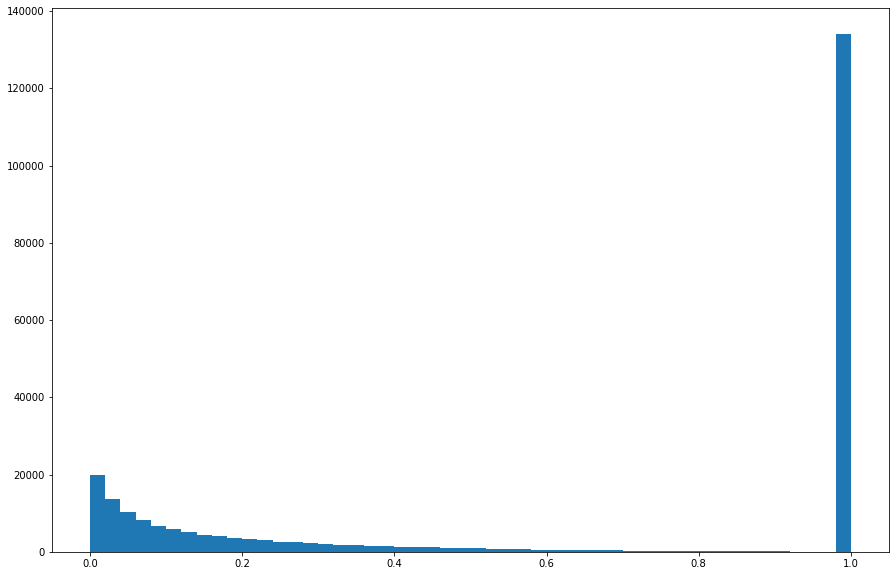

In [27]:
df2["percent_raised"] = df2["pledged"] / df2["goal"]
df2["percent_raised"] = df2["percent_raised"].apply(lambda x: 1 if x > 1 else x)

fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(df2["percent_raised"], bins=50)

In [28]:
df["deadline"] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])

In [4]:
df["success"] = (df["goal"] - df["pledged"]) < 0

In [5]:
df["duration"] = df["deadline"] - df["launched"]
df["duration_days"] = df["duration"].apply(lambda x: x.days)
df["launched_month"] = df["launched"].apply(lambda x: x.month)
df["deadline_month"] = df["deadline"].apply(lambda x: x.month)

In [6]:
def categorical_string_to_int(series):
    uniques = series.unique()
    unique_to_int_dict = {t[0]: t[1] for t in zip(uniques, range(len(uniques)))}
    
    return series.apply(lambda x: unique_to_int_dict[x])

In [7]:
df["category_int"] = categorical_string_to_int(df["category"])
df["main_category_int"] = categorical_string_to_int(df["main_category"])

In [8]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [9]:
X_cols = ["category_int", "main_category_int", "goal", "duration_days", "launched_month", "deadline_month"]
y_col = "success"

In [12]:
train_X = df_train[X_cols]
train_y = df_train[y_col]
test_X = df_test[X_cols]
test_y = df_test[y_col]

In [13]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(train_X, train_y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
model.score(test_X, test_y)

0.5696128249243121

In [15]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(train_X, train_y)

/home/delta/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.score(test_X, test_y)

0.5696128249243121

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn_model.score(test_X, test_y)

0.6439803144880567

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6, 3))
clf.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
clf.score(test_X, test_y)

0.6525693860947732

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_name_counts = count_vect.fit_transform(df_train["name"])
X_name_counts.shape

(299881, 126241)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_name_counts)
X_train_tf = tf_transformer.transform(X_name_counts)
X_train_tf.shape

(299881, 126241)

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, df_train[y_col])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
X_new_counts = count_vect.transform(df_test["name"])
X_new_tfidf = tf_transformer.transform(X_new_counts)
clf.score(X_new_tfidf, df_test[y_col])

0.6727350324757598

In [29]:
type(X_new_tfidf)

scipy.sparse.csr.csr_matrix

In [34]:
np.array(df_train[X_cols])

array([[0.0e+00, 0.0e+00, 1.0e+03, 5.8e+01, 8.0e+00, 1.0e+01],
       [1.0e+00, 1.0e+00, 3.0e+04, 5.9e+01, 9.0e+00, 1.1e+01],
       [1.0e+00, 1.0e+00, 4.5e+04, 4.4e+01, 1.0e+00, 2.0e+00],
       ...,
       [1.0e+00, 1.0e+00, 1.5e+04, 4.5e+01, 7.0e+00, 8.0e+00],
       [5.7e+01, 1.2e+01, 1.5e+04, 3.0e+01, 1.0e+00, 2.0e+00],
       [7.5e+01, 1.0e+01, 2.0e+03, 2.7e+01, 7.0e+00, 8.0e+00]])

In [37]:
np.array(df_train[X_cols]).shape

(299881, 6)

In [36]:
X_train_tf.shape

(299881, 126241)

In [39]:
X_train_full = scipy.sparse.hstack([X_train_tf, np.array(df_train[X_cols])])

In [40]:
X_test_full = scipy.sparse.hstack([X_new_tfidf, np.array(df_test[X_cols])])

In [41]:
clf.fit(X_train_full, df_train[y_col])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
clf.score(X_test_full, df_test[y_col])

0.47772042838661494

In [43]:
full_mlp_class = MLPClassifier(hidden_layer_sizes=(6, 3))
full_mlp_class.fit(X_train_full, df_train[y_col])

/home/delta/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)